In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sns


In [6]:
df_purchase_behaviour = pd.read_csv('E:\python\python_project\Quantium purchasing behaviour analysis project 3\QVI_purchase_behaviour.csv')
df_transaction = pd.read_excel('E:\python\python_project\Quantium purchasing behaviour analysis project 3\QVI_transaction_data.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Hp\AppData\Local\Temp\ipykernel_10412\3144996460.py:1: SyntaxWarning: invalid escape sequence '\p'
  df_purchase_behaviour = pd.read_csv('E:\python\python_project\Quantium purchasing behaviour analysis project 3\QVI_purchase_behaviour.csv')
C:\Users\Hp\AppData\Local\Temp\ipykernel_10412\3144996460.py:2: SyntaxWarning: invalid escape sequence '\p'
  df_transaction = pd.read_excel('E:\python\python_project\Quantium purchasing behaviour analysis project 3\QVI_transaction_data.xlsx')


In [7]:
df_purchase_behaviour.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [8]:
df_transaction.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [9]:
df = pd.merge(df_purchase_behaviour,df_transaction,on='LYLTY_CARD_NBR', how ='inner')
print(df)

        LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER   DATE  \
0                 1000  YOUNG SINGLES/COUPLES          Premium  43390   
1                 1002  YOUNG SINGLES/COUPLES       Mainstream  43359   
2                 1003         YOUNG FAMILIES           Budget  43531   
3                 1003         YOUNG FAMILIES           Budget  43532   
4                 1004  OLDER SINGLES/COUPLES       Mainstream  43406   
...                ...                    ...              ...    ...   
264831         2370701         YOUNG FAMILIES       Mainstream  43442   
264832         2370751         YOUNG FAMILIES          Premium  43374   
264833         2370961         OLDER FAMILIES           Budget  43397   
264834         2370961         OLDER FAMILIES           Budget  43400   
264835         2373711  YOUNG SINGLES/COUPLES       Mainstream  43448   

        STORE_NBR  TXN_ID  PROD_NBR                                 PROD_NAME  \
0               1       1         5    Nat

In [10]:
df.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [11]:
df['DATE']=pd.to_datetime(df['DATE'])

In [12]:
df['DATE'] = df['DATE'].dt.date

In [13]:
#Total sales amount
TOT_SALES = round(df['TOT_SALES'].sum(),2)
print(TOT_SALES)

1934415.0


In [14]:
#Total sales amount with respect to lifestage
sales_by_lifestage = df.groupby(['LIFESTAGE'])['TOT_SALES'].sum().reset_index()
print(sales_by_lifestage)

                LIFESTAGE  TOT_SALES
0  MIDAGE SINGLES/COUPLES  184751.30
1            NEW FAMILIES   50433.45
2          OLDER FAMILIES  353767.20
3   OLDER SINGLES/COUPLES  402426.75
4                RETIREES  366470.90
5          YOUNG FAMILIES  316160.10
6   YOUNG SINGLES/COUPLES  260405.30


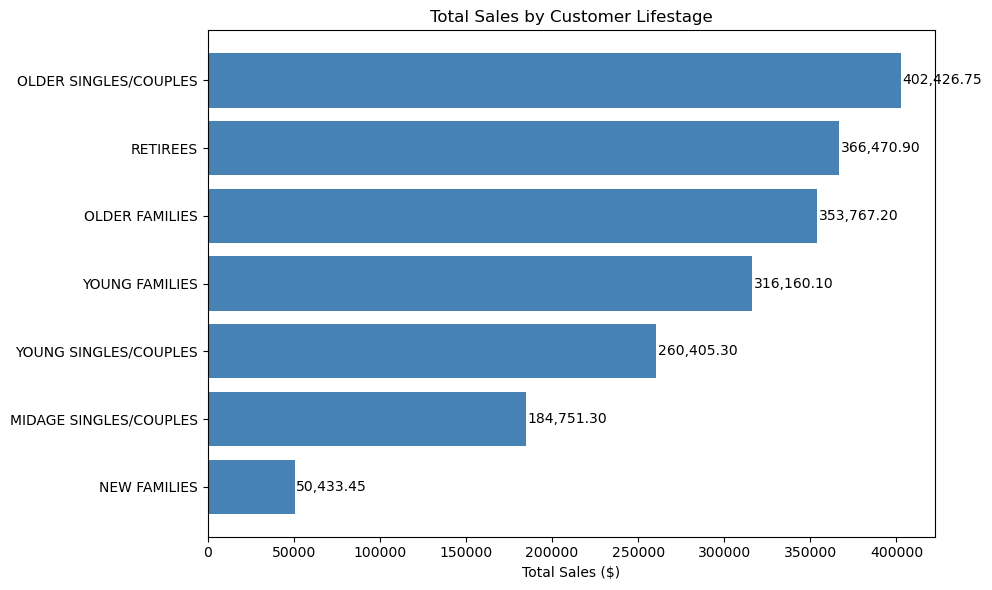

In [15]:
import matplotlib.pyplot as plt

# Your grouped data
lifestage = [
    'MIDAGE SINGLES/COUPLES',
    'NEW FAMILIES',
    'OLDER FAMILIES',
    'OLDER SINGLES/COUPLES',
    'RETIREES',
    'YOUNG FAMILIES',
    'YOUNG SINGLES/COUPLES'
]

tot_sales = [
    184751.30,
    50433.45,
    353767.20,
    402426.75,
    366470.90,
    316160.10,
    260405.30
]

# Sort by total sales for better readability
lifestage, tot_sales = zip(*sorted(zip(lifestage, tot_sales), key=lambda x: x[1]))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(lifestage, tot_sales, color='steelblue')

# Add labels on bars
for bar in bars:
    plt.text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,.2f}', va='center')

plt.xlabel("Total Sales ($)")
plt.title("Total Sales by Customer Lifestage")
plt.tight_layout()
plt.show()


In [16]:
df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'DATE', 'STORE_NBR',
       'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [25]:
#Total sales amount with respect to PREMIUM_CUSTOMER
sales_by_premium_customer = df.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
print(sales_by_premium_customer)

  PREMIUM_CUSTOMER  TOT_SALES
0           Budget  676211.55
1       Mainstream  750744.50
2          Premium  507458.95


<BarContainer object of 3 artists>

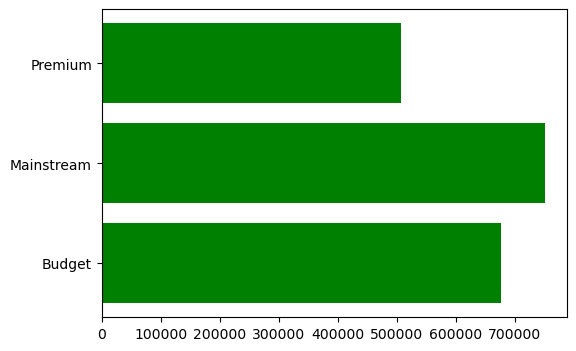

In [18]:
plt.figure(figsize=(6,4))
plt.barh(sales_by_premium_customer['PREMIUM_CUSTOMER'],sales_by_premium_customer['TOT_SALES'],color='GREEN')


In [37]:
df.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,1970-01-01,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1970-01-01,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,1970-01-01,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,1970-01-01,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,1970-01-01,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [45]:
#LIFESTAGE wise prod quantity purchased
prod_qty_life_stage = df.groupby(['LIFESTAGE'])['PROD_QTY'].sum().reset_index()
print(prod_qty_life_stage)

                LIFESTAGE  PROD_QTY
0  MIDAGE SINGLES/COUPLES     47721
1            NEW FAMILIES     12847
2          OLDER FAMILIES     94992
3   OLDER SINGLES/COUPLES    104203
4                RETIREES     94166
5          YOUNG FAMILIES     84561
6   YOUNG SINGLES/COUPLES     66634


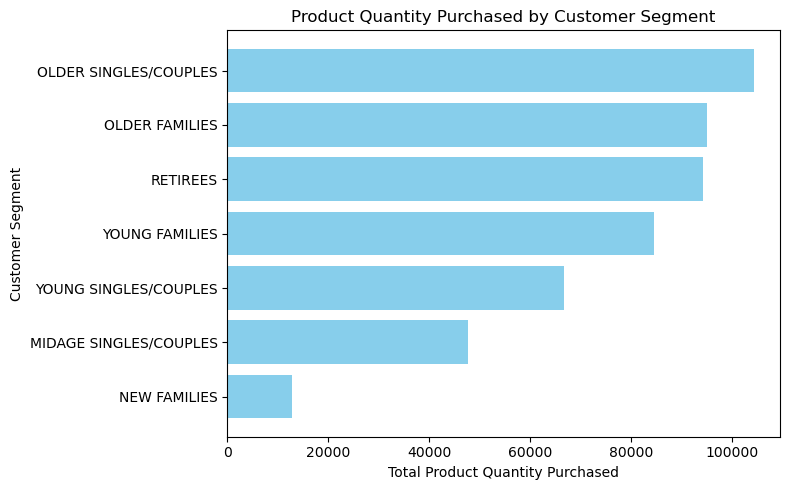

In [46]:

# Sort DataFrame for better visual order
prod_qty_life_stage_sorted = prod_qty_life_stage.sort_values(by='PROD_QTY', ascending=True)

plt.figure(figsize=(8, 5))
plt.barh(prod_qty_life_stage_sorted['LIFESTAGE'], prod_qty_life_stage_sorted['PROD_QTY'], color='skyblue')
plt.title('Product Quantity Purchased by Customer Segment')
plt.xlabel('Total Product Quantity Purchased')
plt.ylabel('Customer Segment')
plt.tight_layout()
plt.show()


In [47]:
#PREMIUM_CUSTOMER wise prod quantity purchased
premium_customer_Qty_purchased = df.groupby(['PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()
print(premium_customer_Qty_purchased)

  PREMIUM_CUSTOMER  PROD_QTY
0           Budget    177898
1       Mainstream    193965
2          Premium    133261


C:\Users\Hp\AppData\Local\Temp\ipykernel_10412\484734695.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=premium_customer_Qty_purchased['PREMIUM_CUSTOMER'],y=premium_customer_Qty_purchased['PROD_QTY'],palette='Set2')


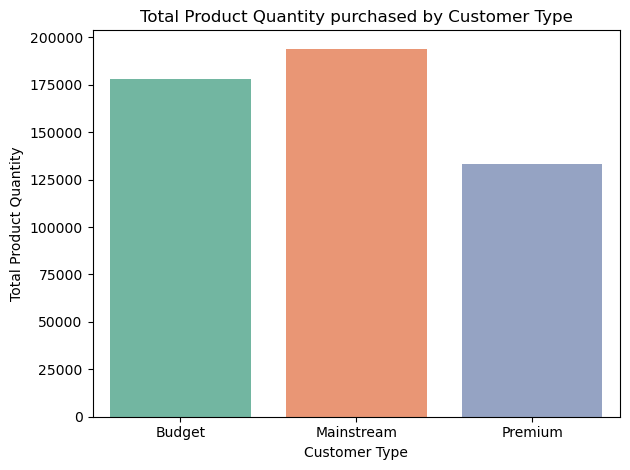

In [50]:
sns.barplot(x=premium_customer_Qty_purchased['PREMIUM_CUSTOMER'],y=premium_customer_Qty_purchased['PROD_QTY'],palette='Set2')
plt.title('Total Product Quantity purchased by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Product Quantity')
plt.tight_layout()
plt.show()

In [60]:
#Top 10 Product that customer wants to buy
product_sold_by_number= df.groupby(['PROD_NAME'])['PROD_NBR'].count().sort_values(ascending=False)
product_sold_by_number.head(10)

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Name: PROD_NBR, dtype: int64

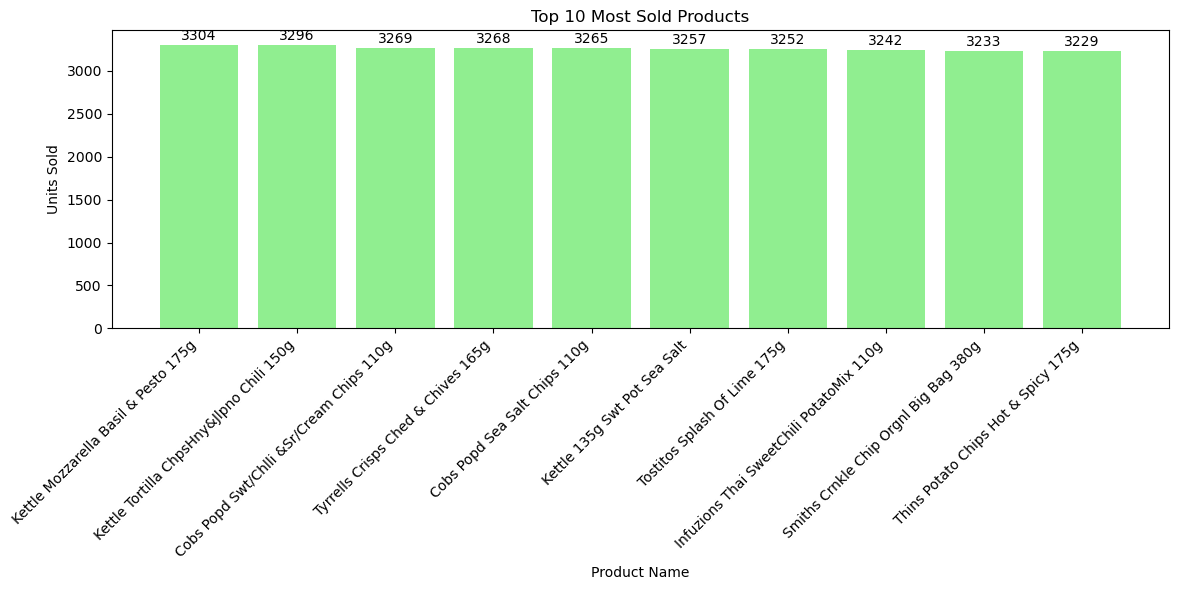

In [65]:
import matplotlib.pyplot as plt

# Product names and their respective sold counts
products = [
    'Kettle Mozzarella Basil & Pesto 175g',
    'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
    'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
    'Tyrrells Crisps Ched & Chives 165g',
    'Cobs Popd Sea Salt Chips 110g',
    'Kettle 135g Swt Pot Sea Salt',
    'Tostitos Splash Of Lime 175g',
    'Infuzions Thai SweetChili PotatoMix 110g',
    'Smiths Crnkle Chip Orgnl Big Bag 380g',
    'Thins Potato Chips Hot & Spicy 175g'
]

counts = [3304, 3296, 3269, 3268, 3265, 3257, 3252, 3242, 3233, 3229]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(products, counts, color='lightgreen')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 20, int(yval), ha='center', va='bottom')

# Styling
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product Name')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()
